In [1]:
import numpy as np
import matplotlib.pyplot as plt

def rosenbrock(x, y, a=1, b=100):
    return (a - x)**2 + b * (y - x**2)**2

def grad_rosenbrock(x, y, a=1, b=100):
    df_dx = -2 * (a - x) - 4 * b * x * (y - x**2)
    df_dy = 2 * b * (y - x**2)
    return np.array([df_dx, df_dy])

def sgd(x0, y0, learning_rate, num_iterations):
    x, y = x0, y0
    history = []
    for _ in range(num_iterations):
        grad = grad_rosenbrock(x, y) + np.random.normal(0, 0.1, size=2) 
        x -= learning_rate * grad[0]
        y -= learning_rate * grad[1]
        history.append((x, y, rosenbrock(x, y)))
    return history

def rmsprop(x0, y0, learning_rate, num_iterations, gamma=0.9, epsilon=1e-8):
    x, y = x0, y0
    cache = np.array([0, 0])  
    history = []
    for _ in range(num_iterations):
        grad = grad_rosenbrock(x, y)
        cache = gamma * cache + (1 - gamma) * grad**2
        x -= learning_rate * grad[0] / (np.sqrt(cache[0]) + epsilon)
        y -= learning_rate * grad[1] / (np.sqrt(cache[1]) + epsilon)
        history.append((x, y, rosenbrock(x, y)))
    return history

def adam(x0, y0, learning_rate, num_iterations, beta1=0.9, beta2=0.999, epsilon=1e-8):
    x, y = x0, y0
    m = np.array([0, 0])  # First moment (mean)
    v = np.array([0, 0])  # Second moment (uncentered variance)
    history = []
    for t in range(1, num_iterations + 1):
        grad = grad_rosenbrock(x, y)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad**2
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        x -= learning_rate * m_hat[0] / (np.sqrt(v_hat[0]) + epsilon)
        y -= learning_rate * m_hat[1] / (np.sqrt(v_hat[1]) + epsilon)
        history.append((x, y, rosenbrock(x, y)))
    return history

C:\Users\deepp\AppData\Local\Temp\ipykernel_16568\4177206470.py:5: RuntimeWarning: overflow encountered in scalar power
  return (a - x)**2 + b * (y - x**2)**2
C:\Users\deepp\AppData\Local\Temp\ipykernel_16568\4177206470.py:8: RuntimeWarning: overflow encountered in scalar multiply
  df_dx = -2 * (a - x) - 4 * b * x * (y - x**2)
C:\Users\deepp\AppData\Local\Temp\ipykernel_16568\4177206470.py:17: RuntimeWarning: invalid value encountered in scalar subtract
  x -= learning_rate * grad[0]


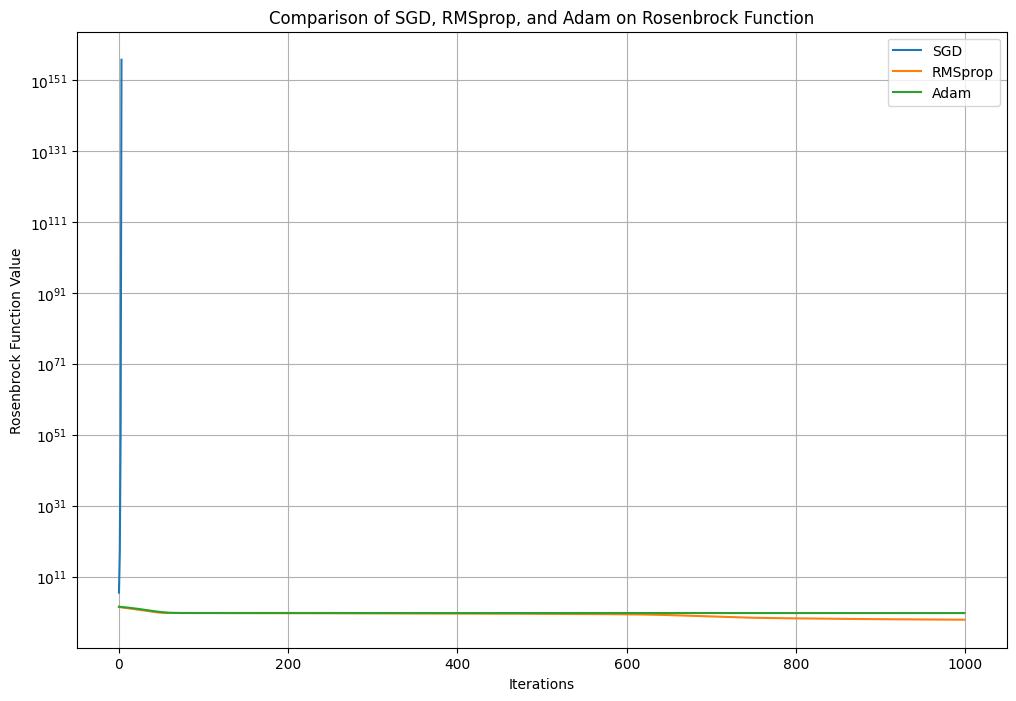

In [2]:
x0, y0 = -2.0, 2.0  
learning_rate = 0.01
num_iterations = 1000

sgd_history = sgd(x0, y0, learning_rate, num_iterations)
rmsprop_history = rmsprop(x0, y0, learning_rate, num_iterations)
adam_history = adam(x0, y0, learning_rate, num_iterations)

plt.figure(figsize=(12, 8))
plt.plot([f for _, _, f in sgd_history], label="SGD")
plt.plot([f for _, _, f in rmsprop_history], label="RMSprop")
plt.plot([f for _, _, f in adam_history], label="Adam")
plt.xlabel("Iterations")
plt.ylabel("Rosenbrock Function Value")
plt.title("Comparison of SGD, RMSprop, and Adam on Rosenbrock Function")
plt.legend()
plt.grid()
plt.yscale("log")  
plt.show()